# Assignment 2.1 Use Case - Tayko Software Cataloger

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import dmba

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from dmba import backward_elimination, forward_selection, stepwise_selection

from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary
%matplotlib inline

Before we start to build predictive models, we first acknowledge that Tayko, a software catalog firm that sells games and educational software, has already conducted a mailing experiment and collected responses from 2,000 customers. This case study examines how the company prepared to launch a revised collection of items in a new catalog mailing and leverages the experimental dataset to model purchasing behavior and spending. The goal is to use these insights to guide Tayko’s future catalog campaigns toward higher efficiency and profitability.

In [395]:
df=pd.read_csv('Tayko.csv')

# Basic information
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape of dataset: (2000, 25)

Data types:
 sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [396]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [397]:
display(df.columns)

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [398]:
df.isnull().sum() # Check for missing values

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

## 1. Gross Profit = Expect Revenue - Mailing Cost

In [399]:
# 1. Computer the average spending perv person in the test mailing 
# (Including purchase and non purchased, non purchaser spent = 0)
ave_spending = df['Spending'].mean()

# 2. Get the total revunue which is the answer multiply 180,000

expected_revenue = ave_spending * 180_000
mailing_cost = 180_000 * 2


# 3. Substract the mailing cost: 180,000 x 2 =$360,000
gross_profit = expected_revenue - mailing_cost

print('Average spending per person:', ave_spending)
print('Expected revenue:', expected_revenue)
print('mailing cost:', mailing_cost)
print('Gross profit:', gross_profit)


Average spending per person: 102.625
Expected revenue: 18472500.0
mailing cost: 360000
Gross profit: 18112500.0


In [400]:
df["US"].value_counts()

US
1    1649
0     351
Name: count, dtype: int64

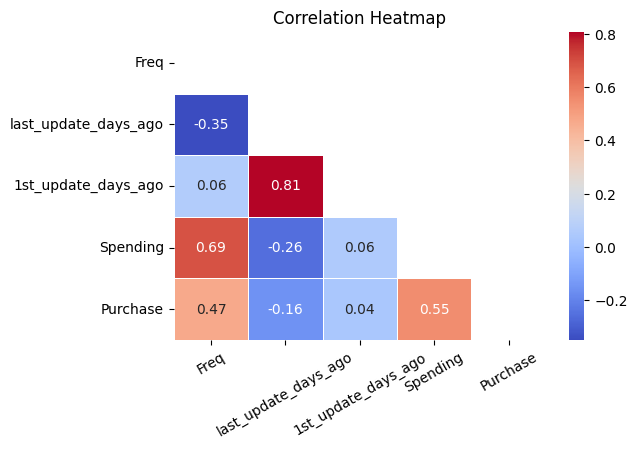

In [401]:
numeric_features = ["Freq", "last_update_days_ago", "1st_update_days_ago", "Spending", "Purchase"]
df_numeric = df[numeric_features]
corr = df_numeric.corr()

# Upper Triangle plot
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,4))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, 
            annot_kws={"size": 10}, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=30)
plt.title("Correlation Heatmap")
plt.show()

## 2. Logistic regression Modeling (Model for classifying a customer as a purchaser or nonpurchaser)

### 2.1 Train/Validation/Test Split (Stratified 800 / 700 / 500)

In [402]:
# drop features
X = df.drop(columns=["Spending", "Purchase", "sequence_number"], errors="ignore")
y =df["Purchase"]
# train/valid split
train_X, tmp_X, train_y, tmp_y =train_test_split(X, y, train_size=800, stratify=y, random_state=42)
# valid/test split
valid_X, test_X, valid_y, test_y =train_test_split(tmp_X, tmp_y, test_size=500, stratify=tmp_y, random_state=42)

print('train_X shape:', train_X.shape[0])
print('valid_X shape:', valid_X.shape[0]) 
print('test_X shape:', test_X.shape[0])

train_X shape: 800
valid_X shape: 700
test_X shape: 500


### 2.2 Logistic Regression (L2, lbfgs) — Trained on Training Set; Probabilities & Validation Performance

In [403]:
from dmba import classificationSummary
# Build pipeline: standardize features, then logistic regression
pipe = Pipeline([("scaler", StandardScaler()), 
                 ("logit", LogisticRegression(penalty="l2", max_iter=1000, solver="lbfgs"))])

# Train model (training set only)
pipe.fit(train_X, train_y)

# probabilities & predictions 
proba = pipe.predict_proba(valid_X)        # shape (n, 2) -> columns for classes [0, 1]
pred  = pipe.predict(valid_X)

# acc = accuracy_score(valid_y, val_pred)
# auc = roc_auc_score(valid_y, val_proba)

# build  result frame
full_result = pd.DataFrame({
    'actual':    valid_y.values,
    'p(0)':      proba[:, 0],
    'p(1)':      proba[:, 1],   # purchase probability
    'predicted': pred
}).sort_values('p(1)', ascending=False)

classificationSummary(full_result.actual, full_result.predicted)
print("classification_report:\n")
print(classification_report(valid_y, pred, digits=3))

Confusion Matrix (Accuracy 0.8143)

       Prediction
Actual   0   1
     0 283  67
     1  63 287
classification_report:

              precision    recall  f1-score   support

           0      0.818     0.809     0.813       350
           1      0.811     0.820     0.815       350

    accuracy                          0.814       700
   macro avg      0.814     0.814     0.814       700
weighted avg      0.814     0.814     0.814       700



Interpretation 2.1 and 2.2: the model achieves about 81.4% accuracy, with precision=0.811 and recall=0.820 for purchasers, which means it correctly identifies most buyers while keeping false positives relatively low. The confusion matrix shows that 67 non-purchasers would be mistakenly targeted (wasted mailings), while 63 true purchasers would be missed. The model does a good job ranking which customers are most likely to buy. It performs much better than sending catalogs at random and provides purchase probabilities that can be used to guide profit analysis.

## 3. Models for predicting spending among the purchasers

### 3.1 Purchaser only subsets
From previous defined training and validation sets, keep only records where Purchase = 1. Define predictors X and target y = Spending.

In [404]:
print(train_y.value_counts())

Purchase
1    400
0    400
Name: count, dtype: int64


In [405]:
# 3.1: Purchaser-only subsets; redefine X and y for Spending

# filters for train/validation rows
train_filter = df.index.isin(train_X.index)
valid_filter = df.index.isin(valid_X.index)

# Keep only purchasers (Purchase == 1)
train_purch = df[train_filter & (df["Purchase"] == 1)]
valid_purch = df[valid_filter & (df["Purchase"] == 1)]

# Define predictors (drop targets/ID-like columns) and new target = Spending
X_train_p = train_purch.drop(columns=["Purchase", "Spending", "sequence_number"], errors="ignore")
y_train_p = train_purch["Spending"]

X_valid_p = valid_purch.drop(columns=["Purchase", "Spending", "sequence_number"], errors="ignore")
y_valid_p = valid_purch["Spending"]

# Quick check
print("Train purchasers:", X_train_p.shape, y_train_p.shape)
print("Valid purchasers:", X_valid_p.shape, y_valid_p.shape)

Train purchasers: (400, 22) (400,)
Valid purchasers: (350, 22) (350,)


In [406]:
y_train_p

2        127
14       192
23       174
29       354
45       159
        ... 
1972     320
1980      98
1986     145
1989    1030
1994     184
Name: Spending, Length: 400, dtype: int64

#### 3.2.1 Multiple linear regression

In [407]:
lr = LinearRegression()
lr.fit(X_train_p, y_train_p)
#print coefficients
print('intercept', lr.intercept_)
coef_table = pd.DataFrame({"Predictor": X_train_p.columns,
                           "Coefficient": lr.coef_})
display(coef_table)
# Print performance measures 
# # based on the trainig set (purchasers)
regressionSummary(y_train_p, lr.predict(X_train_p))

intercept 122.90673571037372


,Predictor,Coefficient
0,US,18.618756
1,source_a,22.970667
2,source_c,-43.699780
3,source_b,-37.639370
4,source_d,-65.071902
5,source_e,-39.933289
6,source_m,-55.665131
7,source_o,41.312097
8,source_h,-152.976257
9,source_r,49.381204



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 181.8183
            Mean Absolute Error (MAE) : 108.5417
          Mean Percentage Error (MPE) : -83.3628
Mean Absolute Percentage Error (MAPE) : 112.4249


In [408]:
# Get predictions based on X_valid_p
lin_pred = lr.predict(X_valid_p)

# Get RMSE and MAE on validation set
lin_rmse = np.sqrt(mean_squared_error(y_valid_p, lin_pred))
lin_mae = mean_absolute_error(y_valid_p, lin_pred)

result = pd.DataFrame({'Predicted': lin_pred, 'Actual': y_valid_p, 
                       'Residual': y_valid_p - lin_pred})

print(result.head(20))

# based on the validation set
regressionSummary(y_valid_p, lin_pred)

      Predicted  Actual    Residual
0     88.797490     128   39.202510
8    444.408741     489   44.591259
9    170.077343     174    3.922657
18    94.592360     130   35.407640
20   283.733158     386  102.266842
21   276.931351     161 -115.931351
24   229.195120     131  -98.195120
25   147.620586     189   41.379414
31   175.242849     352  176.757151
41   207.158200      34 -173.158200
43   830.957907     639 -191.957907
44   253.905185     638  384.094815
50   241.647766     232   -9.647766
54   170.793172     375  204.206828
60   244.617923     136 -108.617923
78   201.305580     161  -40.305580
81   168.674359     129  -39.674359
83   238.870108      98 -140.870108
86   199.759076     158  -41.759076
105  147.586064     405  257.413936

Regression statistics

                      Mean Error (ME) : -21.1440
       Root Mean Squared Error (RMSE) : 144.9845
            Mean Absolute Error (MAE) : 99.8359
          Mean Percentage Error (MPE) : -92.6650
Mean Absolute Percentage 

75% residual threshold: 134.40496491556274
0.7457142857142857


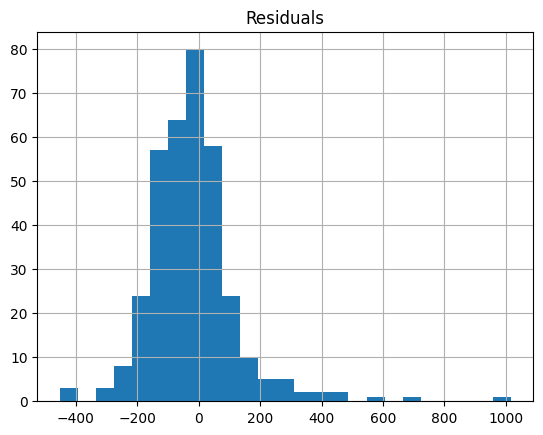

In [409]:
# DetermineDetermine the percentage of datapoints with a residual in 75% threshold
residuals = y_valid_p - lin_pred
# Take absolute value
abs_resid = np.abs(residuals)

# 75th percentile threshold
threshold = np.percentile(abs_resid, 75)

# Percentage of data points within this threshold
within_75 = np.mean(abs_resid <= threshold) * 100

print("75% residual threshold:", threshold)
print(len(residuals[(residuals > -134) & (residuals < 134)]) /len(residuals))
pd.DataFrame({"Residuals": residuals}).hist(bins=25)
plt.show()

Most prediction errors are centered around zero with a roughly symmetric distribution, and about 75% of the residuals fall within a moderate range, means the model good fit with some larger outliers.

#### 3.2.2 Regression trees

In [410]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_p, y_train_p)

tree_pred = tree.predict(X_valid_p)
tree_rmse = np.sqrt(mean_squared_error(y_valid_p, tree_pred))
tree_mae = mean_absolute_error(y_valid_p, tree_pred)

#### 3.2.3 Model selection and explain
Compare both models on the validation set, choose the better one.

In [411]:
print("Validation Results:")
print(f"Linear Regression: RMSE={lin_rmse:.2f}, MAE={lin_mae:.2f}")
print(f"Regression Tree:   RMSE={tree_rmse:.2f}, MAE={tree_mae:.2f}")

# Choose model with lower error
if tree_rmse < lin_rmse:
    print("→ Regression Tree performs better on validation set.")
else:
    print("→ Linear Regression performs better on validation set.")

Validation Results:
Linear Regression: RMSE=144.98, MAE=99.84
Regression Tree:   RMSE=175.23, MAE=104.98
→ Linear Regression performs better on validation set.


#### stepwise forward selection for the linear regression 

In [412]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Forward stepwise on TRAIN only
base_lr = LinearRegression()
sfs = SequentialFeatureSelector(
    base_lr, direction="forward", n_features_to_select="auto",
    scoring="neg_mean_squared_error", cv=5, n_jobs=-1
).fit(X_train_p, y_train_p)

# Selected features and final fit
sel_feats = X_train_p.columns[sfs.get_support()]
best_model = LinearRegression().fit(X_train_p[sel_feats], y_train_p)

# Validate
lr_pred = best_model.predict(X_valid_p[sel_feats])
lr_rmse = np.sqrt(mean_squared_error(y_valid_p, lr_pred))
lr_mae  = mean_absolute_error(y_valid_p, lr_pred)

print("Stepwise LR selected:", list(sel_feats))
print(f"Validation — Linear Regression: RMSE={lr_rmse:.2f}, MAE={lr_mae:.2f}")

Stepwise LR selected: ['source_a', 'source_c', 'source_d', 'source_m', 'source_h', 'source_t', 'source_p', 'Freq', 'last_update_days_ago', 'Gender=male', 'Address_is_res']
Validation — Linear Regression: RMSE=144.79, MAE=98.02


Intepretation 3.2.3: The goal in Question 3 was to predict how much a customer will spend if they purchase. Between the two models tested, multiple linear regression achieved lower errors (RMSE = 144.98, MAE = 99.84) than the regression tree (RMSE = 175.23, MAE = 104.98). Stepwise regression further confirmed the strength of the linear model, and validation results showed it predicts spending more accurately. Therefore, linear regression is chosen as the better model for forecasting spending.

## 4. Score Analysis and Profit Estimation Using Test Data

### 4.1 Add a column - Logistic regression

In [413]:
# Predict probability of purchase (class=1) from logistic regression pipeline
test_proba = pipe.predict_proba(test_X)[:, 1]

# Create Score Analysis DataFrame
score_analysis = test_X.copy()
score_analysis["Purchase"] = test_y.values
score_analysis["p_purchase"] = test_proba

In [414]:
score_analysis.dtypes

US                        int64
source_a                  int64
source_c                  int64
source_b                  int64
source_d                  int64
source_e                  int64
source_m                  int64
source_o                  int64
source_h                  int64
source_r                  int64
source_s                  int64
source_t                  int64
source_u                  int64
source_p                  int64
source_x                  int64
source_w                  int64
Freq                      int64
last_update_days_ago      int64
1st_update_days_ago       int64
Web order                 int64
Gender=male               int64
Address_is_res            int64
Purchase                  int64
p_purchase              float64
dtype: object

### 4.2 Add another column - predict spending amount from (chosen model from 3.2.3)

In [415]:
# chosen linear regression (stepwise)
# Use the same selected predictors as in stepwise
spend_pred = best_model.predict(test_X[sel_feats])

score_analysis["pred_spending"] = spend_pred

In [416]:
list(score_analysis.columns)
score_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1052 to 475
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   US                    500 non-null    int64  
 1   source_a              500 non-null    int64  
 2   source_c              500 non-null    int64  
 3   source_b              500 non-null    int64  
 4   source_d              500 non-null    int64  
 5   source_e              500 non-null    int64  
 6   source_m              500 non-null    int64  
 7   source_o              500 non-null    int64  
 8   source_h              500 non-null    int64  
 9   source_r              500 non-null    int64  
 10  source_s              500 non-null    int64  
 11  source_t              500 non-null    int64  
 12  source_u              500 non-null    int64  
 13  source_p              500 non-null    int64  
 14  source_x              500 non-null    int64  
 15  source_w              500

In [417]:
score_analysis.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,p_purchase,pred_spending
1052,1,1,0,0,0,0,0,0,0,0,...,0,1,3067,3067,0,0,0,1,0.581226,167.637028
1603,1,0,0,0,0,0,0,0,0,0,...,0,1,2690,2690,1,0,0,1,0.770639,148.687872
1784,0,0,0,0,0,0,0,0,0,0,...,0,1,4127,4127,0,0,0,1,0.551669,113.068412
464,0,0,0,0,0,0,0,0,0,0,...,1,1,1091,1091,0,0,0,0,0.409325,188.322887
752,1,1,0,0,0,0,0,0,0,0,...,0,1,2947,2947,0,1,0,1,0.496562,140.151103


### 4.3 skip

### 4.4 Add expected spending (adjusted probability × predicted spending)
 1. In the mailing experiment, Tayko mailed 20,000 names and got 1,065 purchasers. That gives the true response rate: 1065 / 20000 = 0.053
 2. But for modeling, the dataset was rebalanced to 1,000 purchasers and 1,000 non-purchasers. That makes the apparent response rate = 0.5 (50%) in the training data.
 3. So after fitting the logistic regression, we need to adjust the model’s predicted purchase probability back to the true population rate to get the adjusted probability of purchase 0.053/0.5 =0.107.

In [418]:
adjust_factor = 0.053 / 0.5   # = 0.107
score_analysis["expected_spending"] = (
    score_analysis["p_purchase"] * adjust_factor * score_analysis["pred_spending"]
)

### 4.5 Plot cumulative gains chart of the expected spending

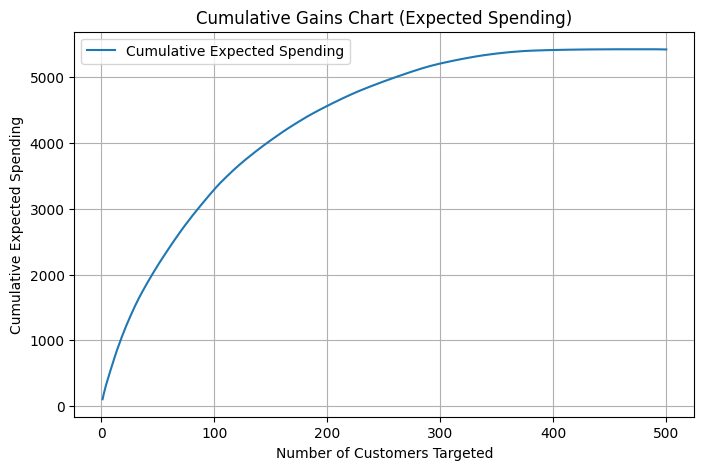

In [419]:
# Sort customers by expected spending (highest to lowest)
score_sorted = score_analysis.sort_values("expected_spending", ascending=False).reset_index(drop=True)

# Cumulative expected spending
cumulative_spending = np.cumsum(score_sorted["expected_spending"])

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_spending)+1), cumulative_spending, label="Cumulative Expected Spending")
plt.xlabel("Number of Customers Targeted")
plt.ylabel("Cumulative Expected Spending")
plt.title("Cumulative Gains Chart (Expected Spending)")
plt.legend()
plt.grid(True)
plt.show()

### 4.6 using this cumulative gains curve (not directly), estimate the gross profit - based on the model.
Estimate gross profit for mailing 180,000 names

1.	Compute the average expected spending per record in the test sample.
2.	Scale to 180,000.
3.	Subtract mailing costs ($2 × 180,000).

In [420]:
# Average expected spending in test sample
avg_exp_spending = score_analysis["expected_spending"].mean()

# Scale up to 180,000 customers
total_expected_spending = avg_exp_spending * 180000

# Mailing cost
mailing_cost = 180000 * 2

# Gross profit
gross_profit = total_expected_spending - mailing_cost

print(f"Avg expected spending per record: ${avg_exp_spending:.2f}")
print(f"Total expected spending: ${total_expected_spending:.2f}")
print(f"Total expected cost: ${mailing_cost:.2f}")
print(f"Estimated gross profit (180k mailing): ${gross_profit:,.2f}")

Avg expected spending per record: $10.84
Total expected spending: $1951953.83
Total expected cost: $360000.00
Estimated gross profit (180k mailing): $1,591,953.83


In [421]:
score_analysis.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,p_purchase,pred_spending,expected_spending
1052,1,1,0,0,0,0,0,0,0,0,...,1,3067,3067,0,0,0,1,0.581226,167.637028,10.328112
1603,1,0,0,0,0,0,0,0,0,0,...,1,2690,2690,1,0,0,1,0.770639,148.687872,12.145977
1784,0,0,0,0,0,0,0,0,0,0,...,1,4127,4127,0,0,0,1,0.551669,113.068412,6.611893
464,0,0,0,0,0,0,0,0,0,0,...,1,1091,1091,0,0,0,0,0.409325,188.322887,8.171040
752,1,1,0,0,0,0,0,0,0,0,...,1,2947,2947,0,1,0,1,0.496562,140.151103,7.376933


## 5. Summary and Result

**Business Objective** 
As the data scientist supporting Tayko, a software catalog firm that sells games and educational software, my objective is to help optimize its catalog mailing strategy by reducing wasted costs and focusing on customers most likely to purchase and spend. Since sending the catalog to everyone is prohibitively expensive, the goal is to target the right group of customers in order to maximize profit.

**Models Used and Why**  
To do this, I applied a few different data mining approaches. First, I used logistic regression to classify customers as purchasers or non-purchasers and to generate a probability of purchase for each record. Then, for those predicted to purchase, I tested both multiple linear regression and regression trees to estimate spending. I also applied stepwise regression to reduce predictors and avoid overfitting, ensuring that only the most relevant variables were kept in the model. The linear regression model consistently produced lower error rates (RMSE and MAE) compared to the regression tree, and stepwise selection confirmed that it provided a more stable and interpretable solution.

**Model Results and Recommendations**  
The results show that this combined modeling strategy works well. Logistic regression achieved strong classification accuracy, and linear regression predicted spending with better performance than regression trees. The cumulative gains chart further demonstrated that targeting customers by expected spending yields far greater returns than random mailing. Using the predicted probabilities and expected spending, the estimated gross profit from mailing to 180,000 customers is about $1.59 million after costs.

**Recommendation:** Based on the gains curve, Tayko should target approximately the top 120,000–140,000 customers ranked by expected spending (probability × predicted spending), rather than mailing to the entire 180,000 names. This cutoff balances mailing costs against incremental revenue, ensuring each additional mailing remains profitable. Under this strategy, Tayko can expect an estimated $1.5–$1.6 million gross profit, a significant improvement over a random or full mailing.

**Next Steps:** Tayko should operationalize this by (1) applying the logistic regression model to score the entire 200,000 eligible customers, (2) predicting spending with the linear regression model for likely purchasers, (3) ranking all customers by expected spending, and (4) selecting the top-ranked segment (≈120k–140k) for catalog distribution. This ensures the company reduces wasted costs, focuses on the most profitable customers, and creates a repeatable, data-driven process for future campaigns.